### 데이터 확인

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('./data/netflix_customer_churn.csv')

In [12]:
display(df.head())
print(f'df.shape : {df.shape}, df.size : {df.size}')

,customer_id,age,gender,subscription_type,watch_hours,last_login_days,region,device,monthly_fee,churned,payment_method,number_of_profiles,avg_watch_time_per_day,favorite_genre
0,a9b75100-82a8-427a-a208-72f24052884a,51,Other,Basic,14.73,29,Africa,TV,8.99,1,Gift Card,1,0.49,Action
1,49a5dfd9-7e69-4022-a6ad-0a1b9767fb5b,47,Other,Standard,0.70,19,Europe,Mobile,13.99,1,Gift Card,5,0.03,Sci-Fi
2,4d71f6ce-fca9-4ff7-8afa-197ac24de14b,27,Female,Standard,16.32,10,Asia,TV,13.99,0,Crypto,2,1.48,Drama
3,d3c72c38-631b-4f9e-8a0e-de103cad1a7d,53,Other,Premium,4.51,12,Oceania,TV,17.99,1,Crypto,2,0.35,Horror
4,4e265c34-103a-4dbb-9553-76c9aa47e946,56,Other,Standard,1.89,13,Africa,Mobile,13.99,1,Crypto,2,0.13,Action


df.shape : (5000, 14), df.size : 70000


In [13]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   customer_id             5000 non-null   object 
 1   age                     5000 non-null   int64  
 2   gender                  5000 non-null   object 
 3   subscription_type       5000 non-null   object 
 4   watch_hours             5000 non-null   float64
 5   last_login_days         5000 non-null   int64  
 6   region                  5000 non-null   object 
 7   device                  5000 non-null   object 
 8   monthly_fee             5000 non-null   float64
 9   churned                 5000 non-null   int64  
 10  payment_method          5000 non-null   object 
 11  number_of_profiles      5000 non-null   int64  
 12  avg_watch_time_per_day  5000 non-null   float64
 13  favorite_genre          5000 non-null   object 
dtypes: float64(3), int64(4), object(7)
memor

None

In [14]:
df.gender.unique()

array(['Other', 'Female', 'Male'], dtype=object)

결측치 확인:
customer_id               0
age                       0
gender                    0
subscription_type         0
watch_hours               0
last_login_days           0
region                    0
device                    0
monthly_fee               0
churned                   0
payment_method            0
number_of_profiles        0
avg_watch_time_per_day    0
favorite_genre            0
dtype: int64

고유값 개수:
customer_id               5000
age                         53
gender                       3
subscription_type            3
watch_hours               2343
last_login_days             61
region                       6
device                       5
monthly_fee                  3
churned                      2
payment_method               5
number_of_profiles           5
avg_watch_time_per_day     505
favorite_genre               7
dtype: int64

=== 수치형 변수 상관관계 분석 ===

수치형 컬럼: ['age', 'watch_hours', 'last_login_days', 'monthly_fee', 'churned', 'number_of_profiles', 'avg_wat

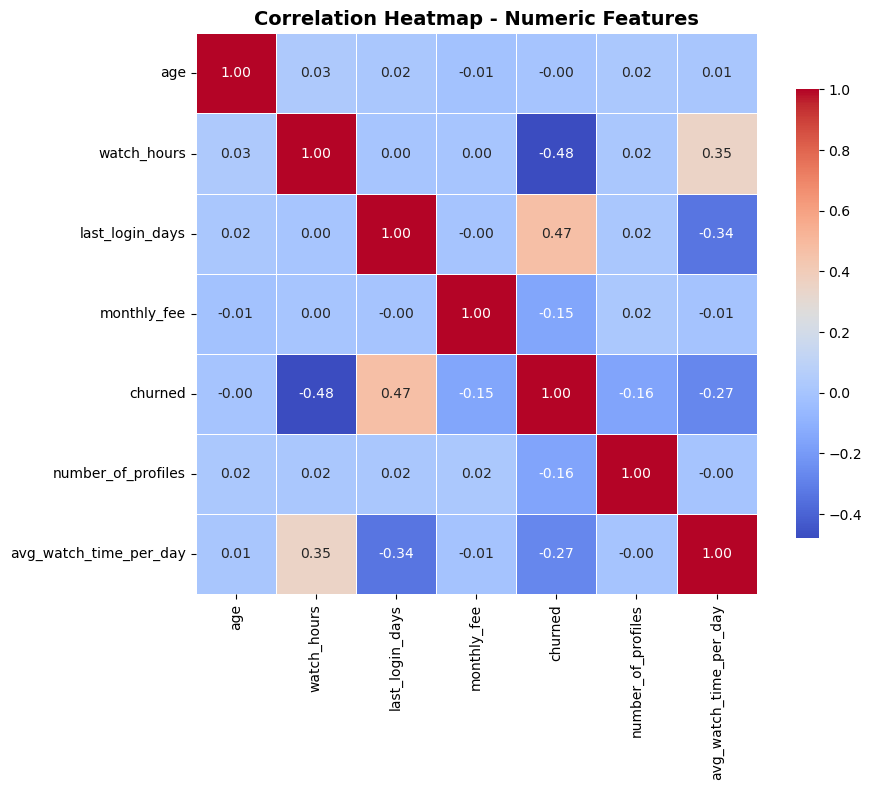


churned와 상관관계가 높은 변수 (절댓값 기준):
watch_hours               0.479916
last_login_days           0.471590
avg_watch_time_per_day    0.272958
number_of_profiles        0.158614
monthly_fee               0.152117
Name: churned, dtype: float64


In [15]:
# 결측치 및 고유값 확인
print("결측치 확인:")
print(df.isna().sum())
print("\n고유값 개수:")
print(df.nunique())

# 상관관계 분석
print("\n=== 수치형 변수 상관관계 분석 ===")
# 수치형 컬럼만 선택
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
print(f"\n수치형 컬럼: {list(numeric_cols)}")

# 상관관계 행렬
correlation_matrix = df[numeric_cols].corr()
print("\n상관관계 행렬:")
print(correlation_matrix)

# 타겟 변수(churned)와의 상관관계 확인
print("\nchurned와의 상관관계:")
print(correlation_matrix['churned'].sort_values(ascending=False))

# 상관관계 히트맵 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', 
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Correlation Heatmap - Numeric Features', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# churned와 높은 상관관계를 가진 변수 찾기 (절댓값 기준)
churned_corr = correlation_matrix['churned'].drop('churned').abs().sort_values(ascending=False)
print("\nchurned와 상관관계가 높은 변수 (절댓값 기준):")
print(churned_corr.head())

### 데이터 전처리

#### 필요없는 컬럼 제거
- customer_id
- last_login_days
- monthly_fee : subscription_type과 유사
- payment_method

In [16]:
# customer_id(ID), monthly_fee(월 이용료), payment_method(결제 수단) 컬럼 제거
drop_df = df.drop(columns=['customer_id', 'monthly_fee', 'payment_method'])
drop_df.head()

,age,gender,subscription_type,watch_hours,last_login_days,region,device,churned,number_of_profiles,avg_watch_time_per_day,favorite_genre
0,51,Other,Basic,14.73,29,Africa,TV,1,1,0.49,Action
1,47,Other,Standard,0.70,19,Europe,Mobile,1,5,0.03,Sci-Fi
2,27,Female,Standard,16.32,10,Asia,TV,0,2,1.48,Drama
3,53,Other,Premium,4.51,12,Oceania,TV,1,2,0.35,Horror
4,56,Other,Standard,1.89,13,Africa,Mobile,1,2,0.13,Action


#### One-Hot
- gender
- subscription_type
- region
- device
- favorite_genre

In [17]:
# gender, subscription_type, region, device, favorite_genre one hot True = 1 / False = 0
onehot_df = pd.get_dummies(drop_df, columns=['gender', 'subscription_type', 'region', 'device', 'favorite_genre'], drop_first=False).astype(int)

onehot_df.head()

,age,watch_hours,last_login_days,churned,number_of_profiles,avg_watch_time_per_day,gender_Female,gender_Male,gender_Other,subscription_type_Basic,...,device_Mobile,device_TV,device_Tablet,favorite_genre_Action,favorite_genre_Comedy,favorite_genre_Documentary,favorite_genre_Drama,favorite_genre_Horror,favorite_genre_Romance,favorite_genre_Sci-Fi
0,51,14,29,1,1,0,0,0,1,1,...,0,1,0,1,0,0,0,0,0,0
1,47,0,19,1,5,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
2,27,16,10,0,2,1,1,0,0,0,...,0,1,0,0,0,0,1,0,0,0
3,53,4,12,1,2,0,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
4,56,1,13,1,2,0,0,0,1,0,...,1,0,0,1,0,0,0,0,0,0


#### Scaling

##### watch_hours - StandardScaler

In [18]:
# watch_hours, avg_watch_time_per_day 결측치 확인 0 포함
# avg_watch_time_per_day라는 컬럼이 없는데 이 데이터에는 왜 있지?
display(onehot_df[['watch_hours', 'avg_watch_time_per_day']].isna().sum())
(onehot_df['watch_hours'].values < 0).sum()

watch_hours               0
avg_watch_time_per_day    0
dtype: int64

np.int64(0)

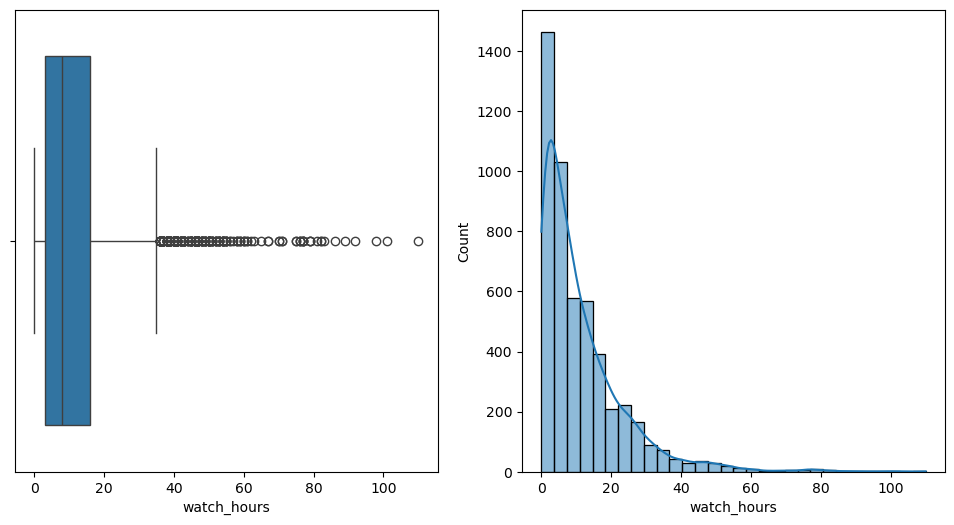

In [19]:
# watch_hours 이상치, 분포 확인
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x=onehot_df['watch_hours'])
plt.subplot(1, 2, 2)
sns.histplot(onehot_df['watch_hours'], bins=30, kde=True)
plt.show()

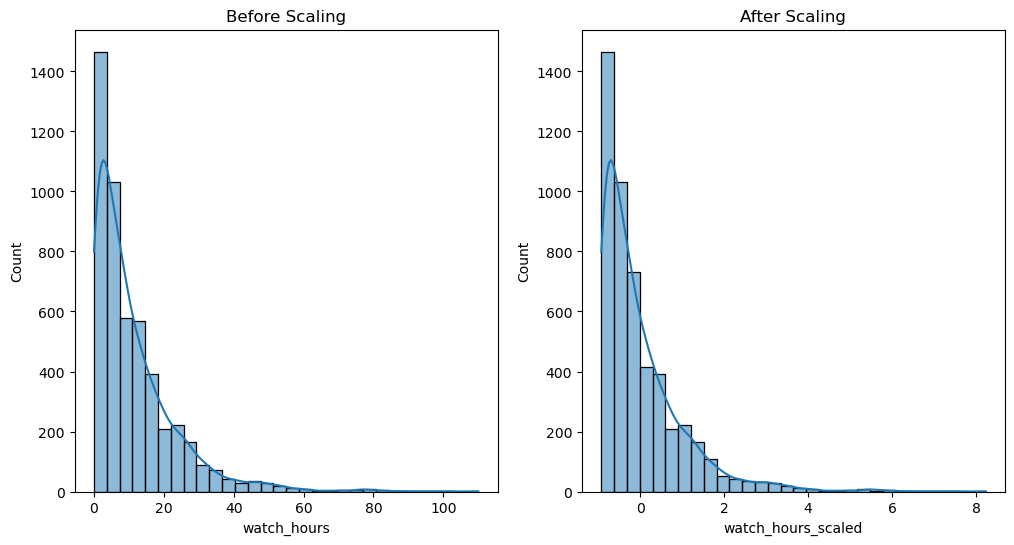

In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
onehot_df['watch_hours_scaled'] = scaler.fit_transform(onehot_df[['watch_hours']])

# 스케일링 전후 비교
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(onehot_df['watch_hours'], bins=30, kde=True)
plt.title('Before Scaling')
plt.subplot(1, 2, 2)
sns.histplot(onehot_df['watch_hours_scaled'], bins=30, kde=True)
plt.title('After Scaling')
plt.show()

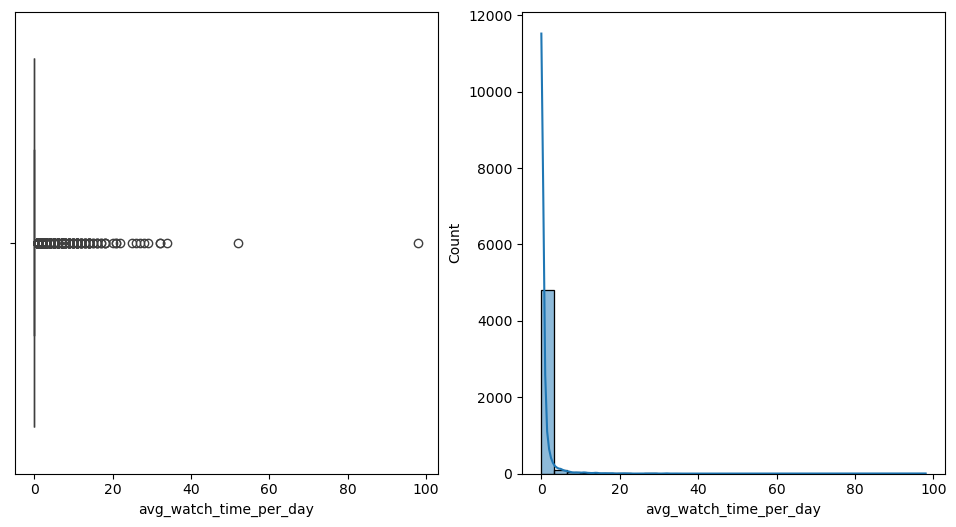

In [21]:
# avg_watch_time_per_day 이상치, 분포 확인
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x=onehot_df['avg_watch_time_per_day'])
plt.subplot(1, 2, 2)
sns.histplot(onehot_df['avg_watch_time_per_day'], bins=30, kde=True)
plt.show()

In [22]:
onehot_df.describe()

,age,watch_hours,last_login_days,churned,number_of_profiles,avg_watch_time_per_day,gender_Female,gender_Male,gender_Other,subscription_type_Basic,...,device_TV,device_Tablet,favorite_genre_Action,favorite_genre_Comedy,favorite_genre_Documentary,favorite_genre_Drama,favorite_genre_Horror,favorite_genre_Romance,favorite_genre_Sci-Fi,watch_hours_scaled
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,...,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,43.847400,11.162800,30.089800,0.503000,3.024400,0.562400,0.342200,0.330800,0.327000,0.332200,...,0.198600,0.209600,0.139400,0.137000,0.145800,0.146200,0.142600,0.145000,0.144000,-7.531753e-17
std,15.501128,12.015289,17.536078,0.500041,1.415841,2.573991,0.474494,0.470548,0.469164,0.471049,...,0.398986,0.407064,0.346398,0.343882,0.352941,0.353342,0.349699,0.352136,0.351125,1.000100e+00
min,18.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.291426e-01
25%,30.000000,3.000000,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.794357e-01
50%,44.000000,8.000000,30.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.632576e-01
75%,58.000000,16.000000,45.000000,1.000000,4.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.026273e-01
max,70.000000,110.000000,60.000000,1.000000,5.000000,98.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.226776e+00


##### Age

In [23]:
# age - one hot by age group (drop False)
age_bins = [0, 18, 25, 35, 45, 55, 65, 100]
age_labels = ['0-18', '19-25', '26-35', '36-45', '46-55', '56-65', '65+']
onehot_df['age_group'] = pd.cut(onehot_df['age'], bins=age_bins, labels=age_labels, right=False)
onehot_df = pd.get_dummies(onehot_df, columns=['age_group'], drop_first=False).astype(int)
onehot_df.head()

,age,watch_hours,last_login_days,churned,number_of_profiles,avg_watch_time_per_day,gender_Female,gender_Male,gender_Other,subscription_type_Basic,...,favorite_genre_Romance,favorite_genre_Sci-Fi,watch_hours_scaled,age_group_0-18,age_group_19-25,age_group_26-35,age_group_36-45,age_group_46-55,age_group_56-65,age_group_65+
0,51,14,29,1,1,0,0,0,1,1,...,0,0,0,0,0,0,0,1,0,0
1,47,0,19,1,5,0,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
2,27,16,10,0,2,1,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,53,4,12,1,2,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,56,1,13,1,2,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


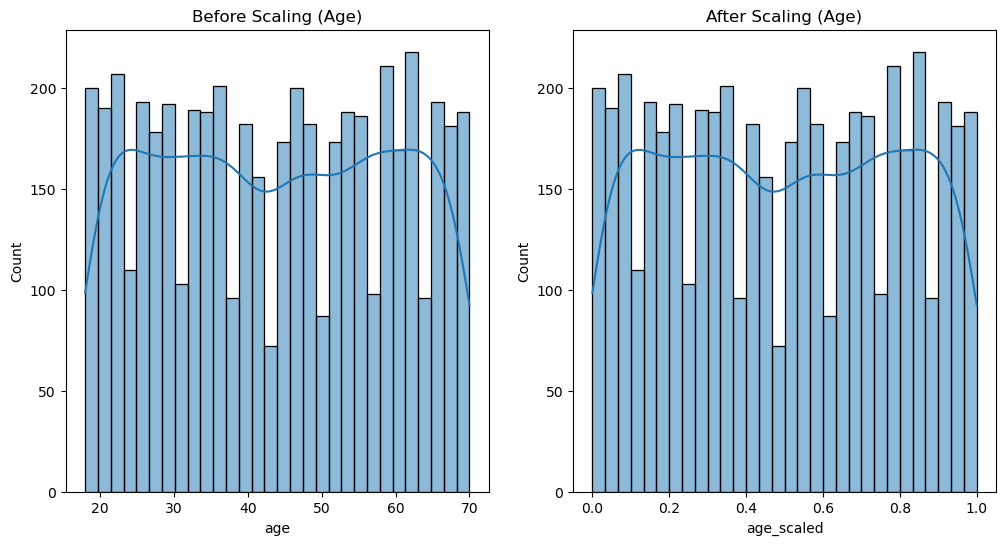


원본 나이와 스케일링된 나이 비교:
   age  age_scaled
0   51    0.634615
1   47    0.557692
2   27    0.173077
3   53    0.673077
4   56    0.730769


In [24]:
# age Scaling by MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

# 나이 스케일링
scaler = MinMaxScaler()
onehot_df['age_scaled'] = scaler.fit_transform(onehot_df[['age']])

# 스케일링 전후 비교
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(onehot_df['age'], bins=30, kde=True)
plt.title('Before Scaling (Age)')
plt.subplot(1, 2, 2)
sns.histplot(onehot_df['age_scaled'], bins=30, kde=True)
plt.title('After Scaling (Age)')
plt.show()

# 원본 데이터와 스케일링된 데이터의 처음 몇 행 확인
print("\n원본 나이와 스케일링된 나이 비교:")
print(onehot_df[['age', 'age_scaled']].head())

In [25]:
onehot_df

,age,watch_hours,last_login_days,churned,number_of_profiles,avg_watch_time_per_day,gender_Female,gender_Male,gender_Other,subscription_type_Basic,...,favorite_genre_Sci-Fi,watch_hours_scaled,age_group_0-18,age_group_19-25,age_group_26-35,age_group_36-45,age_group_46-55,age_group_56-65,age_group_65+,age_scaled
0,51,14,29,1,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,0,0.634615
1,47,0,19,1,5,0,0,0,1,0,...,1,0,0,0,0,0,1,0,0,0.557692
2,27,16,10,0,2,1,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0.173077
3,53,4,12,1,2,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0.673077
4,56,1,13,1,2,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0.730769
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,19,49,11,0,4,4,1,0,0,1,...,0,3,0,1,0,0,0,0,0,0.019231
4996,67,9,2,0,3,3,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0.942308
4997,66,16,49,1,2,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0.923077
4998,59,9,3,0,4,2,1,0,0,1,...,1,0,0,0,0,0,0,1,0,0.788462


In [26]:
onehot_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 39 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   age                         5000 non-null   int64  
 1   watch_hours                 5000 non-null   int64  
 2   last_login_days             5000 non-null   int64  
 3   churned                     5000 non-null   int64  
 4   number_of_profiles          5000 non-null   int64  
 5   avg_watch_time_per_day      5000 non-null   int64  
 6   gender_Female               5000 non-null   int64  
 7   gender_Male                 5000 non-null   int64  
 8   gender_Other                5000 non-null   int64  
 9   subscription_type_Basic     5000 non-null   int64  
 10  subscription_type_Premium   5000 non-null   int64  
 11  subscription_type_Standard  5000 non-null   int64  
 12  region_Africa               5000 non-null   int64  
 13  region_Asia                 5000 

In [27]:
onehot_df.describe()

,age,watch_hours,last_login_days,churned,number_of_profiles,avg_watch_time_per_day,gender_Female,gender_Male,gender_Other,subscription_type_Basic,...,favorite_genre_Sci-Fi,watch_hours_scaled,age_group_0-18,age_group_19-25,age_group_26-35,age_group_36-45,age_group_46-55,age_group_56-65,age_group_65+,age_scaled
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,...,5000.000000,5000.000000,5000.0,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000
mean,43.847400,11.162800,30.089800,0.503000,3.024400,0.562400,0.342200,0.330800,0.327000,0.332200,...,0.144000,0.204000,0.0,0.141400,0.189400,0.180000,0.181200,0.195600,0.11240,0.497065
std,15.501128,12.015289,17.536078,0.500041,1.415841,2.573991,0.474494,0.470548,0.469164,0.471049,...,0.351125,0.653964,0.0,0.348469,0.391865,0.384226,0.385222,0.396702,0.31589,0.298099
min,18.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,30.000000,3.000000,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.230769
50%,44.000000,8.000000,30.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.500000
75%,58.000000,16.000000,45.000000,1.000000,4.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.769231
max,70.000000,110.000000,60.000000,1.000000,5.000000,98.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,8.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000


In [28]:
# csv 파일로 저장
onehot_df.to_csv('./data/netflix_customer_churn_preprocessed.csv', index=False)

In [29]:
onehot_df.columns

Index(['age', 'watch_hours', 'last_login_days', 'churned',
       'number_of_profiles', 'avg_watch_time_per_day', 'gender_Female',
       'gender_Male', 'gender_Other', 'subscription_type_Basic',
       'subscription_type_Premium', 'subscription_type_Standard',
       'region_Africa', 'region_Asia', 'region_Europe', 'region_North America',
       'region_Oceania', 'region_South America', 'device_Desktop',
       'device_Laptop', 'device_Mobile', 'device_TV', 'device_Tablet',
       'favorite_genre_Action', 'favorite_genre_Comedy',
       'favorite_genre_Documentary', 'favorite_genre_Drama',
       'favorite_genre_Horror', 'favorite_genre_Romance',
       'favorite_genre_Sci-Fi', 'watch_hours_scaled', 'age_group_0-18',
       'age_group_19-25', 'age_group_26-35', 'age_group_36-45',
       'age_group_46-55', 'age_group_56-65', 'age_group_65+', 'age_scaled'],
      dtype='object')

knn test accuracy: 0.7550, train accuracy: 0.8195
classification report:
              precision    recall  f1-score   support

           0       0.77      0.73      0.75       498
           1       0.74      0.78      0.76       502

    accuracy                           0.76      1000
   macro avg       0.76      0.75      0.75      1000
weighted avg       0.76      0.76      0.75      1000

               precision    recall  f1-score   support

           0       0.83      0.80      0.81      1987
           1       0.81      0.84      0.82      2013

    accuracy                           0.82      4000
   macro avg       0.82      0.82      0.82      4000
weighted avg       0.82      0.82      0.82      4000



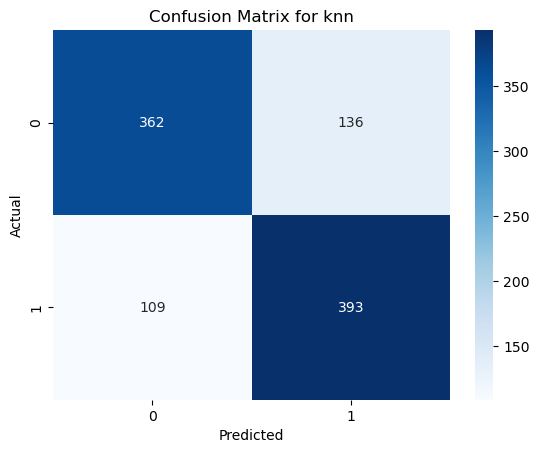

svc test accuracy: 0.7690, train accuracy: 0.7638
classification report:
              precision    recall  f1-score   support

           0       0.77      0.76      0.77       498
           1       0.77      0.78      0.77       502

    accuracy                           0.77      1000
   macro avg       0.77      0.77      0.77      1000
weighted avg       0.77      0.77      0.77      1000

               precision    recall  f1-score   support

           0       0.77      0.74      0.76      1987
           1       0.75      0.79      0.77      2013

    accuracy                           0.76      4000
   macro avg       0.76      0.76      0.76      4000
weighted avg       0.76      0.76      0.76      4000



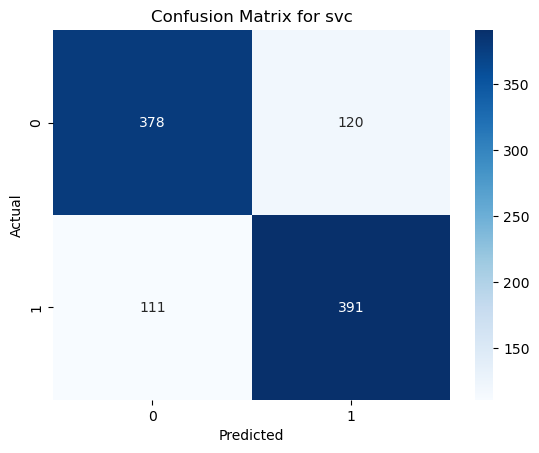

logreg test accuracy: 0.7940, train accuracy: 0.7965
classification report:
              precision    recall  f1-score   support

           0       0.82      0.75      0.78       498
           1       0.77      0.84      0.80       502

    accuracy                           0.79      1000
   macro avg       0.80      0.79      0.79      1000
weighted avg       0.80      0.79      0.79      1000

               precision    recall  f1-score   support

           0       0.82      0.75      0.79      1987
           1       0.77      0.84      0.81      2013

    accuracy                           0.80      4000
   macro avg       0.80      0.80      0.80      4000
weighted avg       0.80      0.80      0.80      4000



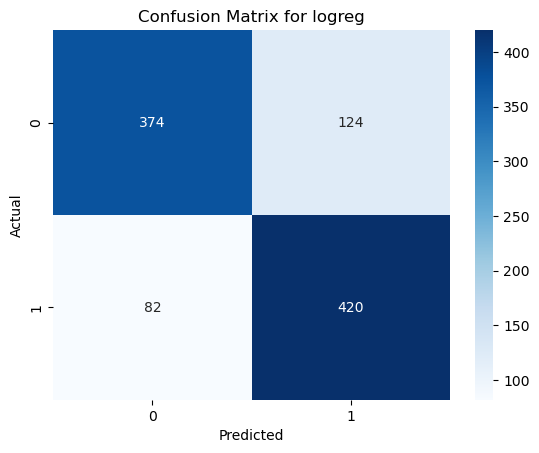

In [30]:
# 분류 모델 파이프라인 생성 후 학습 및 평가
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# './data/netflix_customer_churn_preprocessed.csv' 파일 불러와서 train test split
preprocessed_df = pd.read_csv('./data/netflix_customer_churn_preprocessed.csv')

X = preprocessed_df.drop(columns=['churned', 'age', 'watch_hours', 'age_scaled'])
y = preprocessed_df['churned']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 간단한 파이프라인(KNeighborsClassifier, SVC, LogisticRegression, DecisionTreeClassifier) 생성 및 모델 학습
pipelines = {
    'knn': Pipeline([('knn', KNeighborsClassifier())]),
    'svc': Pipeline([('svc', SVC())]),
    'logreg': Pipeline([('logreg', LogisticRegression(max_iter=1000))])
}

for name, pipeline in pipelines.items():
    pipeline.fit(X_train, y_train)
    score = pipeline.score(X_test, y_test)
    print(f"{name} test accuracy: {score:.4f}, train accuracy: {pipeline.score(X_train, y_train):.4f}")
    print(f"classification report:\n{classification_report(y_test, pipeline.predict(X_test))}\n {classification_report(y_train, pipeline.predict(X_train))}")


    # Correlation 시각화
    y_pred = pipeline.predict(X_test)
    conf_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for {name}')
    plt.show()

### Tree 기반 모델용 전처리 (Random Forest, XGBoost, LightGBM 등)

In [31]:
# 원본 데이터 다시 불러오기
tree_df = df.copy()

# 1. 불필요한 컬럼 제거
print("1. 불필요한 컬럼 제거")
tree_df = tree_df.drop(columns=['customer_id', 'monthly_fee', 'payment_method'])
print(f"제거 후 컬럼 수: {tree_df.shape[1]}\n")

1. 불필요한 컬럼 제거
제거 후 컬럼 수: 11



In [32]:
# 2. 범주형 변수 Label Encoding (Tree 모델은 Label Encoding도 잘 작동)
from sklearn.preprocessing import LabelEncoder

categorical_cols = ['gender', 'subscription_type', 'region', 'device', 'favorite_genre']
print(f"2. Label Encoding 적용할 범주형 컬럼: {categorical_cols}")

# Label Encoder 딕셔너리 저장 (나중에 역변환 가능)
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    tree_df[f'{col}_encoded'] = le.fit_transform(tree_df[col])
    label_encoders[col] = le
    print(f"   - {col}: {tree_df[col].unique()} -> {tree_df[f'{col}_encoded'].unique()}")

# 원본 범주형 컬럼 제거
tree_df = tree_df.drop(columns=categorical_cols)
print(f"\n3. 인코딩 후 컬럼 수: {tree_df.shape[1]}\n")

2. Label Encoding 적용할 범주형 컬럼: ['gender', 'subscription_type', 'region', 'device', 'favorite_genre']
   - gender: ['Other' 'Female' 'Male'] -> [2 0 1]
   - subscription_type: ['Basic' 'Standard' 'Premium'] -> [0 2 1]
   - region: ['Africa' 'Europe' 'Asia' 'Oceania' 'South America' 'North America'] -> [0 2 1 4 5 3]
   - device: ['TV' 'Mobile' 'Laptop' 'Desktop' 'Tablet'] -> [3 2 1 0 4]
   - favorite_genre: ['Action' 'Sci-Fi' 'Drama' 'Horror' 'Romance' 'Comedy' 'Documentary'] -> [0 6 3 4 5 1 2]

3. 인코딩 후 컬럼 수: 11



In [33]:
# 4. 최종 데이터 확인
print("4. 최종 Tree 모델용 데이터:")
display(tree_df.head(10))
print(f"\nShape: {tree_df.shape}")
print(f"\n컬럼 목록:")
print(tree_df.columns.tolist())

4. 최종 Tree 모델용 데이터:


,age,watch_hours,last_login_days,churned,number_of_profiles,avg_watch_time_per_day,gender_encoded,subscription_type_encoded,region_encoded,device_encoded,favorite_genre_encoded
0,51,14.73,29,1,1,0.49,2,0,0,3,0
1,47,0.70,19,1,5,0.03,2,2,2,2,6
2,27,16.32,10,0,2,1.48,0,2,1,3,3
3,53,4.51,12,1,2,0.35,2,1,4,3,4
4,56,1.89,13,1,2,0.13,2,2,0,2,0
5,58,13.80,26,0,3,0.51,0,2,4,2,0
6,48,13.83,20,0,5,0.66,2,0,1,3,5
7,51,14.30,56,1,1,0.25,1,0,2,2,0
8,45,9.98,10,0,3,0.91,2,0,1,2,5
9,32,2.22,34,1,1,0.06,2,1,2,3,3



Shape: (5000, 11)

컬럼 목록:
['age', 'watch_hours', 'last_login_days', 'churned', 'number_of_profiles', 'avg_watch_time_per_day', 'gender_encoded', 'subscription_type_encoded', 'region_encoded', 'device_encoded', 'favorite_genre_encoded']


In [34]:
# 5. 데이터 타입 확인
print("\n5. 데이터 타입:")
print(tree_df.dtypes)

# 6. CSV 파일로 저장
tree_df.to_csv('./data/netflix_customer_churn_tree_preprocessed.csv', index=False)
print("\n✅ Tree 모델용 전처리 데이터 저장 완료: './data/netflix_customer_churn_tree_preprocessed.csv'")


5. 데이터 타입:
age                            int64
watch_hours                  float64
last_login_days                int64
churned                        int64
number_of_profiles             int64
avg_watch_time_per_day       float64
gender_encoded                 int64
subscription_type_encoded      int64
region_encoded                 int64
device_encoded                 int64
favorite_genre_encoded         int64
dtype: object

✅ Tree 모델용 전처리 데이터 저장 완료: './data/netflix_customer_churn_tree_preprocessed.csv'
